In [1]:
import os
import matplotlib.pyplot as plt
try:
	import gadget
except:
	print('couldnt import gadget!')
import numpy as np
import Param as param
import FigureMove as Fig
import auxiliary_functions as aux
import importlib
importlib.reload(aux)
importlib.reload(Fig)

[100, 150] [0.5, 0.5, 0.5] [1.0, 1.0, 1.0]


<module 'FigureMove' from '/home/kristian/analysis/analyze_bubblepaper/FigureMove.py'>

In [2]:
folder = '/home/kristian/analysis/TestSim/R7E45X5M1ASFCMy15/'
# folder = '/home/kristian/Analysis/SnapsTest/PerseusCorrect/R7/E45/X5M1ASFCMy15Ver2020Up10p3p2020/output/'
snap = Fig.quickImport(10, folder=folder)
print(snap.boxsize, snap.center)

/home/kristian/analysis/TestSim/R7E45X5M1ASFCMy15//snap_010.hdf5
generalInfo time:  50.4 Myr
1.4925373134328357 [0.74626866 0.74626866 0.74626866]


In [3]:
print('smallest grid cell dx=%g' %np.min(snap.vol**(1/3)))
N = 1024
print('largest box size to resolve grid assuming N=%i, L=%g' %(N, np.min(snap.vol**(1/3))*N))
N = 64
print('largest box size to resolve grid assuming N=%i, L=%g' %(N, np.min(snap.vol**(1/3))*N))

smallest grid cell dx=0.000550042
largest box size to resolve grid assuming N=1024, L=0.563243
largest box size to resolve grid assuming N=64, L=0.0352027


In [4]:
INFO = {}
INFO['constBXB'] = 0.05
snap.data['SqrtConsEpsB'] = aux.get_value('SqrtAbsoluteConstantMagneticFieldEnergyDensity', snap, INFO=INFO)
snap.data['SqrtEpsB'] = aux.get_value('SqrtMagneticFieldEnergyDensity', snap, INFO=INFO)
snap.data['DistInKpc'] = aux.get_value('DistanceToCenterInKpc', snap, INFO=INFO)

SqrtAbsoluteConstantMagneticFieldEnergyDensity
const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot
[0.74626866 0.74626866 0.74626866]
(0.00030003398198746867, 0.000300029902990299)
(0.00030003398198746867, 0.000300029902990299)


/home/kristian/analysis/analyze_bubblepaper/auxiliary_functions.py:438: UserWarning: dx cannot be larger than d_radius
  warnings.warn('dx cannot be larger than d_radius')


SqrtMagneticFieldEnergyDensity
DistanceToCenterInKpc
using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1492.53 min 0.00142909


## Start with Fourier code

shapes type: (1000000,) shapes pos: (1000000, 3) n**3: 1000000
-0.392
MagneticFieldTurbulent1D
('data', ':min', (-5.087226974007168+0.3793377803121851j))
('data', ':max', (5.725671025053247-0.8187602590267459j))
('data', ':median', (6.416176604051964e-05+0.3134481145293428j))
('data', ':mean', (-6.856438521996921e-05+0.00016952168581194275j))
('data', ':shape', (100, 100, 100))
abstrafo False
err!!!!!!!!!!
... saved figures/DataPlots/PW_SiThe_VaMagnFielTurb1D_FieTyGri_PS1_TyCalm_NBi100_n100_delta0p008_441.hdf5
.. saving figures/test.pdf
MagneticFieldTurbulent1D
('data', ':min', (-5.347824874426061-0.6996426233551104j))
('data', ':max', (5.131164539517211-1.5395762005514122j))
('data', ':median', (-0.00046891616536106555-0.40658049301751165j))
('data', ':mean', (0.0005442502242480894-0.0002325861829320283j))
('data', ':shape', (100, 100, 100))
abstrafo False
cellsize: 5.12e-07, dx: 0.008000000000000002, epsilon 0.001
x.shape, y.shape
(99,) (99,)
... saved figures/DataPlots/PW_SiThe_VaMa

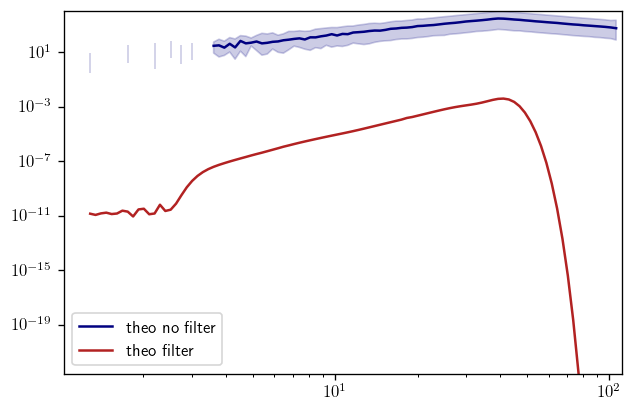

In [68]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import os
import matplotlib.pyplot as plt
try:
	import gadget
except:
	print('couldnt import gadget!')
import numpy as np
import Param as param
import FigureMove as Fig
import auxiliary_functions as aux
import importlib
importlib.reload(aux)
importlib.reload(Fig)
import FourierClass as FC
import importlib
import TheorySnapClass as TS
importlib.reload(FC)
folder = '/home/kristian/analysis/TestSim/R7E45X5M1ASFCMy15/'
# folder = '/home/kristian/Analysis/SnapsTest/PerseusCorrect/R7/E45/X5M1ASFCMy15Ver2020Up10p3p2020/output/'
# snap = Fig.quickImport(10, folder=folder)
box = 0.8
n = 100
# snapTheoNoise = TS.TheorySnapShot(n=n, boxsize=box, spaceDim=3, positionAddNoise=1e-4)
snapTheo = TS.TheorySnapShot(n=n, boxsize=box, spaceDim=3, positionAddNoise=None)
spaceDim, fieldDim, n, delta = 3, 1, n, box/n
print((-(n)/2 + 1)*delta)
loadPlotData = False
savePlotData = False
xlog = ylog = True
Yrange = [None, None]
Xrange = [None, None]
powerspec  = absolute = True

fig, ax = plt.subplots()
variable = 'MagneticFieldTurbulent1D' #SqrtAbsoluteConstantMagneticFieldEnergyDensity MagneticFieldTurbulent1D
coordinate = 'kAbs'
SNAPUSE = None
plotVariableInKspace = True
PowSpecFilter = 'MexicanTopHatFilter'

# ft = FC.FTObj(spaceDim=3, fieldDim=1, n=n, delta=box/n)
# ft.plotFT(coordinate=coordinate, snap=snap, variable=variable, PowSpecFilter=PowSpecFilter, ax=ax, savePlot=True, loadPlotData=loadPlotData,
#           plotVariableInKspace=plotVariableInKspace, xlog=xlog, ylog=ylog,label='snap mexican filter', powerspec=powerspec, absolute=absolute)

# ft = FC.FTObj(spaceDim=3, fieldDim=1, n=n, delta=box/n)
# ft.plotFT(coordinate=coordinate, snap=snap, variable=variable, PowSpecFilter=None, ax=ax, savePlot=True, loadPlotData=loadPlotData,
#           plotVariableInKspace=plotVariableInKspace, xlog=xlog, ylog=ylog,label='snap no filter', powerspec=powerspec, absolute=absolute, color='navy')

# ft = FC.FTObj(spaceDim=spaceDim, fieldDim=fieldDim, n=n, delta=delta)
# ft.plotFT(coordinate=coordinate, snap=None, initializeVariableInKspace=True, variable='SqrtAbsoluteConstantMagneticFieldEnergyDensity', PowSpecFilter=None, ax=ax, savePlot=True, loadPlotData=loadPlotData,
#           plotVariableInKspace=plotVariableInKspace, xlog=xlog, ylog=ylog,label='raw', powerspec=powerspec, absolute=absolute, color='navy')

ft = FC.FTObj(spaceDim=spaceDim, fieldDim=fieldDim, n=n, delta=delta)
ft.plotFT(coordinate=coordinate, snap=SNAPUSE, initializeVariableInKspace=True, variable=variable, PowSpecFilter=None, ax=ax, savePlot=True, loadPlotData=loadPlotData,
          plotVariableInKspace=plotVariableInKspace, xlog=xlog, ylog=ylog,label='theo no filter', powerspec=powerspec, absolute=absolute, color='navy')

ft = FC.FTObj(spaceDim=spaceDim, fieldDim=fieldDim, n=n, delta=delta)
ft.plotFT(coordinate=coordinate, snap=SNAPUSE, initializeVariableInKspace=True, variable=variable, PowSpecFilter=PowSpecFilter, ax=ax, savePlot=True, loadPlotData=loadPlotData,
          plotVariableInKspace=plotVariableInKspace, xlog=xlog, ylog=ylog,label='theo filter', powerspec=powerspec, absolute=absolute, color='firebrick')

# ft.plotFT(coordinate='kAbs', snap=snap, variable='SqrtMagneticFieldEnergyDensity', ax=ax, savePlot=True, loadPlotData=loadPlotData,
#            plotVariableInKspace=True, xlog=xlog, ylog=ylog, color='teal',label='SqrtMagneticFieldEnergyDensity')
# ftT = FC.FTObj(spaceDim=3, fieldDim=1, n=n, delta=box/n)
# ftT.plotFT(coordinate=coordinate, snap=snapTheo, variable=variable, PowSpecFilter=None, ax=ax, savePlot=True, loadPlotData=loadPlotData,
#           plotVariableInKspace=plotVariableInKspace, xlog=xlog, ylog=ylog,label='theo',color='red', powerspec=powerspec, absolute=absolute)

# ftT = FC.FTObj(spaceDim=3, fieldDim=1, n=n, delta=box/n)
# ftT.plotFT(coordinate=coordinate, snap=snapTheoNoise, variable=variable, PowSpecFilter=PowSpecFilter, ax=ax, savePlot=True, loadPlotData=loadPlotData,
#           plotVariableInKspace=plotVariableInKspace, xlog=xlog, ylog=ylog,label='theo noise',color='navy', powerspec=powerspec, absolute=absolute)

Fig.modifyPlot(ax, xlog=True, ylog=True, Yrange=Yrange, Xrange=Xrange)
ax.legend()


In [42]:
x = np.arange(256).reshape(8,2,4,-1)

In [63]:
1/(2*np.pi**2)**(1/2)

0.22507907903927651

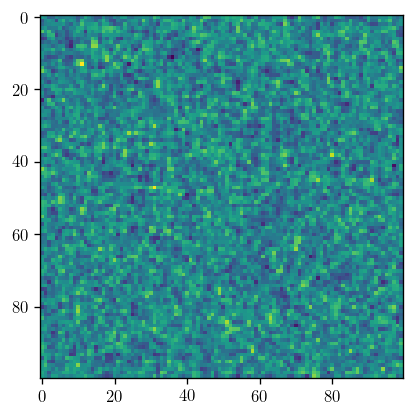

In [61]:
plt.imshow(ft.rspace().real[:,int(n/2),:])

In [44]:
x.flatten()-x.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
x=np.array([2,2,3])

In [22]:
x.real

array([2, 2, 3])

In [25]:
spatialDimensions = 3
kr = 10
cellsize = np.prod(ft.delta)
epsilon = 1e-3
sigma = 1./(2*np.pi**2)**(1./2.)/kr / cellsize**(1./spatialDimensions)
sigma1 = sigma/(1+epsilon)**(1./2.)
sigma2 = sigma*(1+epsilon)**(1./2.)
image = aux.convolutionGaussian(ft.rspace().real, sigma1)-aux.convolutionGaussian(ft.rspace().real, sigma2)

getHistogram
data
[[-2.00189356e-04  7.49699517e-04  4.92834548e-04 ...  2.43790644e-05
  -5.03120570e-04  6.34822588e-05]
 [ 2.56191324e-04  3.38899013e-04  6.76576081e-06 ... -5.66850260e-04
  -3.38599919e-04  7.14314743e-05]
 [-2.82663406e-04 -4.02440043e-04 -1.39402142e-05 ... -2.91994937e-04
  -1.05310737e-04  1.49285638e-04]
 ...
 [ 6.76210092e-04  2.43645776e-04 -4.26079804e-04 ... -2.73479136e-06
   3.38161877e-04  8.44873371e-04]
 [ 5.65523053e-04  1.67231209e-04 -4.57008881e-04 ...  2.21071422e-04
  -2.35162853e-05  4.90189424e-04]
 [ 7.18796927e-05  5.08125401e-04 -3.97522089e-05 ... -3.48611482e-04
  -7.52796820e-04  5.32204719e-05]]
.. saving test.pdf


{'bins': array([-1.53977776e-03, -1.45835768e-03, -1.37693760e-03, -1.29551751e-03,
        -1.21409743e-03, -1.13267735e-03, -1.05125727e-03, -9.69837184e-04,
        -8.88417101e-04, -8.06997019e-04, -7.25576936e-04, -6.44156854e-04,
        -5.62736771e-04, -4.81316689e-04, -3.99896606e-04, -3.18476524e-04,
        -2.37056441e-04, -1.55636358e-04, -7.42162760e-05,  7.20380655e-06,
         8.86238891e-05,  1.70043972e-04,  2.51464054e-04,  3.32884137e-04,
         4.14304219e-04,  4.95724302e-04,  5.77144384e-04,  6.58564467e-04,
         7.39984549e-04,  8.21404632e-04,  9.02824714e-04,  9.84244797e-04,
         1.06566488e-03,  1.14708496e-03,  1.22850504e-03,  1.30992513e-03,
         1.39134521e-03,  1.47276529e-03,  1.55418537e-03]),
 'bin_edges': array([-1.58048780e-03, -1.49906772e-03, -1.41764764e-03, -1.33622756e-03,
        -1.25480747e-03, -1.17338739e-03, -1.09196731e-03, -1.01054722e-03,
        -9.29127142e-04, -8.47707060e-04, -7.66286977e-04, -6.84866895e-04,
      

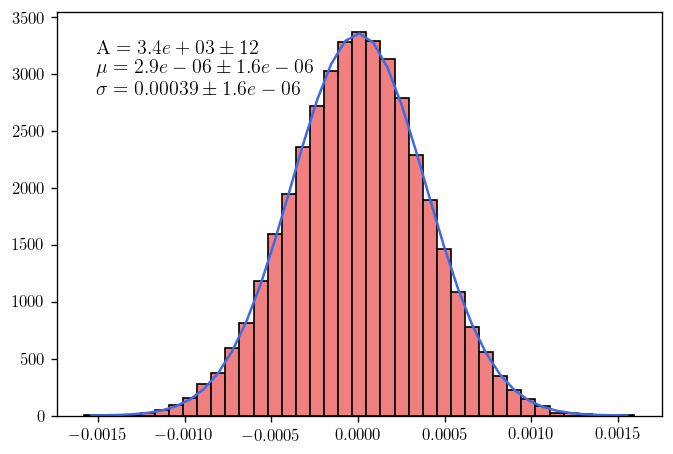

In [26]:
Fig.getHistogram(image, fit='Gaussian', plot=True, plotSave=True, plotFilename='test.pdf',
             plotdpi=400, plotColors=['lightcoral', 'royalblue'], plotFontsize=12, plotShow=True)

In [35]:
np.sum(image**2) * cellsize

1.4991450294893694e-07

In [36]:
0.00039**2

1.521e-07

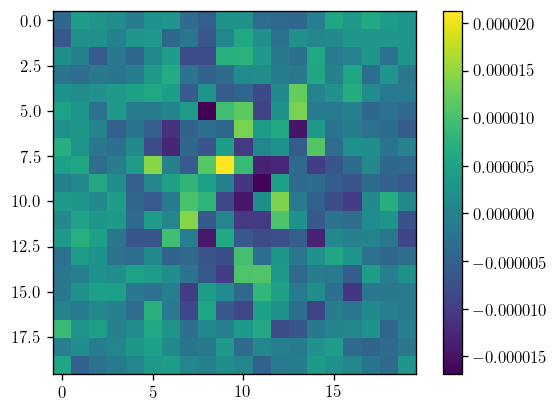

In [17]:
plt.imshow(ft.rspace()[:,10,:])
plt.colorbar()

In [22]:
plt.imshow(image[:,10,:])
plt.colorbar()

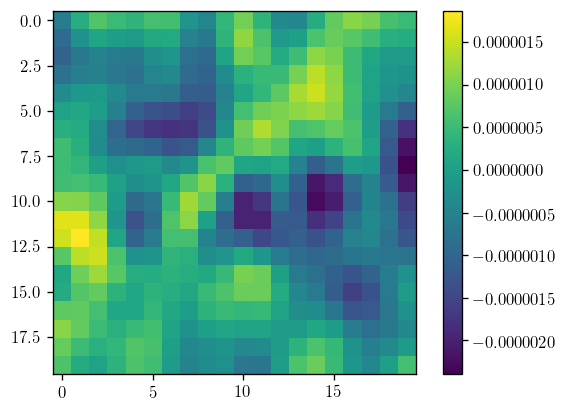

In [25]:
plt.imshow(aux.convolutionGaussian(ft.rspace(), sigma1)[:,10,:])
plt.colorbar()

In [13]:
x

array([[1, 2],
       [3, 4]])

In [17]:
x.ravel()[3]=1
x

array([[1, 2],
       [3, 1]])

In [3]:
snapTheo.data['consB'] = aux.get_ConstantMagneticField(snapTheo)
snap.data['consB'] = aux.get_ConstantMagneticField(snap)
snapTheo.data['dist'] = aux.get_DistanceToCenterInKpc(snapTheo)
snap.data['dist'] = aux.get_DistanceToCenterInKpc(snap)


const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot
[0.2, 0.2, 0.2]
const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot
[0.74626866 0.74626866 0.74626866]
using following center to calculate distance to center:
[200.00000000000003, 200.00000000000003, 200.00000000000003]
pos max 400 min 0
using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1492.53 min 0.00142909


In [4]:
snapTheo.data['dist'].shape, snapTheo.data['consB'].shape

((1000000,), (1000000,))

In [5]:
snap.data['consB'].shape

(6474824,)

In [6]:
snapTheo.data

{'pos': array([[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.0040404 ],
        [0.        , 0.        , 0.00808081],
        ...,
        [0.4       , 0.4       , 0.39191919],
        [0.4       , 0.4       , 0.3959596 ],
        [0.4       , 0.4       , 0.4       ]]),
 'type': array([0., 0., 0., ..., 0., 0., 0.]),
 'consB': array([4.05803444e-06, 4.08084473e-06, 4.10356944e-06, ...,
        4.10356944e-06, 4.08084473e-06, 4.05803444e-06]),
 'dist': array([346.41016151, 344.0932479 , 341.8083911 , ..., 341.8083911 ,
        344.0932479 , 346.41016151])}

In [11]:
# x,y = Fig.do_Radprof(snapTheo.data['dist'], np.sqrt(np.sum(snapTheo.data['consB']**2, axis=1)))
x0,y0 = Fig.do_Radprof(snapTheo.data['dist'], snapTheo.data['consB'])

INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}
statistics ['median', 'std']


/home/kristian/miniconda3/envs/arepoR/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:569: RuntimeWarning: invalid value encountered in sqrt
  (flatsum[a] / flatcount[a]) ** 2)


In [12]:
# x1,y1 = Fig.do_Radprof(snap.data['dist'], np.sqrt(np.sum(snap.data['consB']**2, axis=1)))
x01,y01 = Fig.do_Radprof(snap.data['dist'], snap.data['consB'])

INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}
statistics ['median', 'std']


In [13]:
# plt.plot(x,y, alpha=0.4, label='theo')
# plt.scatter(x1,y1,alpha=0.3)
plt.plot(x0,y0, alpha=0.4, label='theo')
plt.scatter(x01,y01,alpha=0.3)
plt.xlim([0,200])
plt.legend()

In [18]:
x = np.array([1,2,3,4])
y = (x+0.5).reshape(2,2)
z = x**2
np.interp(y,x,z),y**2

(array([[ 2.5,  6.5],
        [12.5, 16. ]]),
 array([[ 2.25,  6.25],
        [12.25, 20.25]]))

In [12]:
np.interp

In [2]:
ftT.rspace()
aux.printDebug(ftT.field, dontShow=['data'])

('data', ':min', 1.393056486963895e-06)
('data', ':max', 0.10009986780520043)
('data', ':median', 0.0500499575121366)
('data', ':mean', 0.05005043181758849)
('data', ':shape', (20, 20, 20))


In [3]:
ftT.kspace()
aux.printDebug(ftT.field, dontShow=['data'])

('data', ':min', (-0.23540088003300733+1.0426643443638546e-16j))
('data', ':max', (4.476646713893849+0j))
('data', ':median', (-4.64495880439193e-07+4.202693718358031e-06j))
('data', ':mean', (3.903747978895452e-07+1.5043305143236374e-19j))
('data', ':shape', (20, 20, 20))


In [4]:
np.random.random()*1e-2

0.0038860180731512786

In [5]:
ft.rspace()
aux.printDebug(ft.field, dontShow=['data'])

('data', ':min', 0.6965788006782532)
('data', ':max', 0.7958950996398926)
('data', ':median', 0.7462874054908752)
('data', ':mean', 0.7462688146233558)
('data', ':shape', (20, 20, 20))


In [6]:
ft.kspace()
aux.printDebug(ft.field, dontShow=['data'])

('data', ':min', (-0.22528994602825902+8.937122951690183e-17j))
('data', ':max', (66.74831195944051+0j))
('data', ':median', (-2.0712864172551817e-05-6.667766704684982e-05j))
('data', ':mean', (0.0077971527517874265-5.551115123125783e-20j))
('data', ':shape', (20, 20, 20))


In [7]:
ftT.field[:,5,-1]

array([-2.08784414e-05-3.69452187e-05j, -4.25693216e-05-3.95317892e-06j,
       -5.23320125e-06-1.89480153e-05j,  1.22535999e-05+1.46577718e-05j,
       -8.02931653e-06-1.50822163e-05j,  1.02368082e-05-2.34623239e-05j,
       -2.53088507e-05-2.10328679e-05j,  2.21842341e-05+1.45680327e-05j,
        1.74838819e-05-3.42092545e-05j, -1.06168141e-05+3.63199323e-05j,
       -2.48869395e-06+1.32846773e-05j, -6.20083157e-06-1.17258099e-06j,
        3.04367533e-05+5.10875724e-07j,  2.69819381e-06-4.82409956e-06j,
       -1.59465894e-05-1.35761069e-05j, -2.54327122e-05-3.82068694e-05j,
        8.15876664e-06-9.06735825e-06j,  1.83664676e-05-1.14740843e-05j,
        1.91567184e-05-1.72825009e-06j, -2.53897612e-05-1.56273919e-05j])

In [8]:
(ft.field[:,:]-snap.center[0])[:,-1,-1]

array([-0.74595767+1.04828110e-04j, -0.74649702-2.95572318e-04j,
       -0.74567786-8.04566162e-04j, -0.74660897-2.18257782e-04j,
       -0.74613724+1.45512854e-04j, -0.74751975+1.56776911e-04j,
       -0.7458641 -1.09795382e-04j, -0.74637438+7.07563489e-04j,
       -0.74656463-1.67111004e-04j, -0.74557177+9.95159897e-04j,
       -0.74573091-8.51006258e-04j, -0.74612175-8.08151916e-04j,
       -0.74681328+6.62394109e-05j, -0.74702   -1.43441816e-04j,
       -0.74617731+1.87213438e-04j, -0.74710586+5.14660511e-04j,
       -0.74644871+3.90080626e-04j, -0.74654686+3.69598575e-04j,
       -0.74646205-1.40577149e-04j, -0.74644401+7.29426759e-04j])

In [10]:
snapTheo.boxsize

1.0

In [14]:
snapTheo.pos.min()

0.0

In [5]:
snap.npart

6474825

In [11]:
x = [1,2,3]
np.prod(x)

6

In [43]:
np.abs(snap.pos).min(), np.abs(snapTheo.data['pos']).min()

(1.4290912e-06, 1.1102230246251565e-16)

In [54]:
snap.data['DIST'] = aux.get_DistanceToCenterInKpc(snap)
snapTheo.data['DIST'] = aux.get_DistanceToCenterInKpc(snap)

using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1492.53 min 0.00142909
using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1492.53 min 0.00142909


In [58]:
snap.data['Econ'] = aux.get_value('SqrtAbsoluteConstantMagneticFieldEnergyDensity', snap)
snapTheo.data['Econ'] = aux.get_value('SqrtAbsoluteConstantMagneticFieldEnergyDensity', snapTheo)

SqrtAbsoluteConstantMagneticFieldEnergyDensity
const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot
(0.00030003398198746867, 0.000300029902990299)
(0.00030003398198746867, 0.000300029902990299)
SqrtAbsoluteConstantMagneticFieldEnergyDensity
const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot


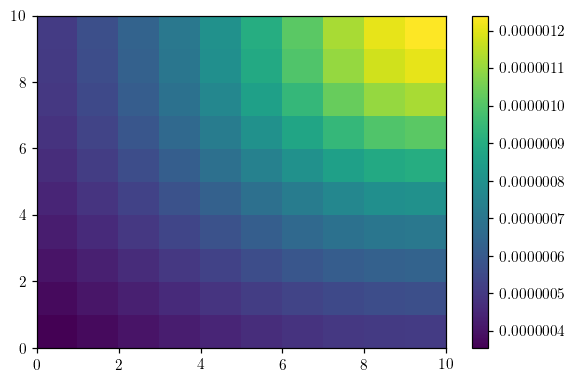

In [63]:
im = plt.pcolormesh(snapTheo.data['Econ'].reshape(n,n,n)[:,int(n/2),:])
plt.colorbar(im)

In [3]:
snapTheo.pos

array([[-0.4, -0.4, -0.4],
       [-0.4, -0.4, -0.3],
       [-0.4, -0.4, -0.2],
       ...,
       [ 0.5,  0.5,  0.3],
       [ 0.5,  0.5,  0.4],
       [ 0.5,  0.5,  0.5]])

In [4]:
snap.pos

array([[0.3814813 , 1.054594  , 0.6215956 ],
       [0.37865028, 1.0511582 , 0.6211873 ],
       [0.37919658, 1.055917  , 0.6206762 ],
       ...,
       [0.38373083, 0.9390306 , 0.40415826],
       [0.37913615, 0.93829024, 0.41013455],
       [0.74626863, 0.74626863, 0.74626863]], dtype=float32)

In [82]:
import TheorySnapClass as TS
importlib.reload(TS)
box = 1.
n = 10
snapTheo = TS.TheorySnapShot(n=n, boxsize=box, spaceDim=3)
gridTheo = Fig.getAgrid(snapTheo, 'Econ', res=[n,n,n], ProjBox=[box]*3, numthreads=16, verbose=0)


(1000, 3)


AttributeError: 'TheorySnapShot' object has no attribute 'nparticlesall'

In [65]:
grid = Fig.getAgrid(snap, 'Econ', res=[n,n,n], ProjBox=[box]*3, numthreads=16, verbose=0)


using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]


In [73]:
im = plt.pcolormesh(grid[:,int(n/2),:])
plt.colorbar(im)

In [5]:
ft.rspace()
fig, ax = plt.subplots()
xvalues = ft.xAbs.flatten()
yvalues = abs(ft.field.flatten())
# ax.scatter(xvalues, yvalues, alpha=0.2, color='grey')
x,y,err = Fig.do_Radprof(xvalues, yvalues, log=True, NBins=30, return_errbar=1)
ax.plot(bin_centresSqrtEpsB/1e3, getFunctionY(bin_centresSqrtEpsB, *paras), color='red', label='fit')
ft.plotFT(coordinate='xAbs', snap=snap, variable='SqrtMagneticFieldEnergyDensity', ax=ax, savePlot=False, loadPlotData=loadPlotData, savePlotData=savePlotData,
          plotVariableInKspace=False, xlog=xlog, ylog=ylog, color='teal', powerspec=False, absolute=False)
ft.plotFT(coordinate='xAbs', snap=snap, variable='SqrtAbsoluteConstantMagneticFieldEnergyDensity', ax=ax, savePlot=False, loadPlotData=loadPlotData, savePlotData=savePlotData,
          plotVariableInKspace=False, xlog=xlog, ylog=ylog, color='lightblue', powerspec=False, absolute=False)
Fig.plotErrorbar(ax, err, x)
Fig.modifyPlot(ax, ylog=True, xlog=True)
#abs(ft.field.flatten())

AttributeError: 'FTObj' object has no attribute 'statusField'

initializeKVectors
redid something in initializeKVectors
initializeXVectors
using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]


/home/kristian/analysis/analyze_bubblepaper/FigureMove.py:4098: UserWarning: do_Radprof: setting MIN from 0 to 0.0078125 to use log
  warnings.warn('do_Radprof: setting MIN from %g to %g to use log' %(minEarly,MIN))


... saved ../figures/DataPlots/PW_Si/home/kristian/analysis/TesSi/R7E45X5M1ASFCMy15//snap_010phdf5_VaSqrMagnFielEnerDens_FieTyGri_PS0_TyCalm_NBi100_n128_delta0p0078_18.hdf5
.. saving ../figures/test.pdf


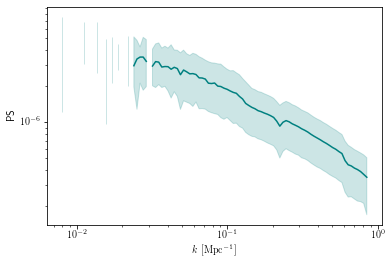

In [91]:
fig, ax = plt.subplots()
ft = FC.FTObj(spaceDim=3, fieldDim=1, n=n, delta=box/n)

ft.plotFT(coordinate='xAbs', snap=snap, variable='SqrtMagneticFieldEnergyDensity', ax=ax, savePlot=True, loadPlotData=loadPlotData,
          plotVariableInKspace=False, xlog=xlog, ylog=ylog, color='teal', powerspec=False, absolute=False)
